In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../readingDataSet/Visadataset.csv')

cat = df.select_dtypes(include = "object").columns
num = df.select_dtypes(exclude = "object").columns

In [8]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
print(num)

print("========================")
print(cat)

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [10]:
wage_data = df['prevailing_wage']
wage_mean = wage_data.mean()
wage_sd = wage_data.std()
nr = wage_data-wage_mean
z = nr/wage_sd

df['prevailing_wage_z'] = z

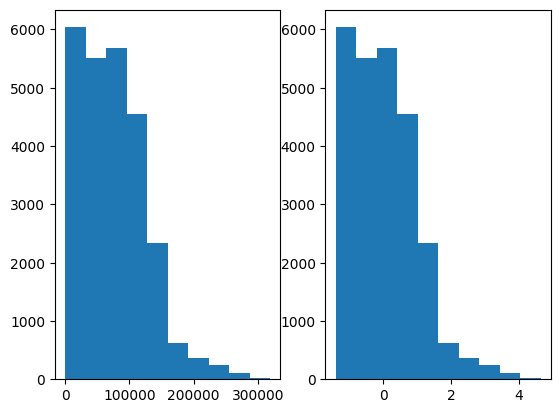

In [17]:
# plt.figure(figsize=(16,8))
plt.subplot(1,2,1).hist(df['prevailing_wage'])
plt.subplot(1,2,2).hist(df['prevailing_wage_z'])
plt.show()

In [18]:
# Now the maximum value index of the both the columns should be same
wage_data.idxmax(), df['prevailing_wage_z'].idxmax()

(21077, 21077)

In [19]:
# Now the min value index of the both the columns should be same
wage_data.idxmin(), df['prevailing_wage_z'].idxmin()

(20575, 20575)

In [21]:
df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
21077,319210.2700,4.634102
20575,2.1367,-1.409682


# Standardization


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
SS= StandardScaler()
SS

,copy,True
,with_mean,True
,with_std,True


In [31]:
df['prevailing_wage_s'] = SS.fit_transform(df[['prevailing_wage']])
# If we use [] single square brackets it gives as series but it we use [[]] it takes as DataFrame

df['prevailing_wage_s']

0       -1.398537
1        0.169835
2        0.919079
3        0.169994
4        1.428604
           ...   
25475    0.049924
25476    3.876159
25477    1.360280
25478    0.221509
25479   -0.067763
Name: prevailing_wage_s, Length: 25480, dtype: float64

In [33]:
df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z','prevailing_wage_s']]

,prevailing_wage,prevailing_wage_z,prevailing_wage_s
21077,319210.2700,4.634102,4.634193
20575,2.1367,-1.409682,-1.409710


# MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

**Without using package**

In [39]:
x = df['prevailing_wage']
xMin = df['prevailing_wage'].min()
xMax = df['prevailing_wage'].max()

xNew = (x-xMin)/(xMax-xMin)
df['prevailing_wage_withOutPackage'] = xNew
xNew

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

**With using package**

In [35]:
df['prevailing_wage_mm'] = mm.fit_transform(df[['prevailing_wage']])
df['prevailing_wage_mm']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage_mm, Length: 25480, dtype: float64

In [37]:
df['prevailing_wage_mm'].min(), df['prevailing_wage_mm'].max()

(np.float64(0.0), np.float64(0.9999999999999999))

In [40]:
df['prevailing_wage_withOutPackage'].idxmax()

21077

In [41]:
df['prevailing_wage_withOutPackage'].idxmin()

20575

In [42]:
df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z','prevailing_wage_s','prevailing_wage_withOutPackage','prevailing_wage_mm']]

,prevailing_wage,prevailing_wage_z,prevailing_wage_s,prevailing_wage_withOutPackage,prevailing_wage_mm
21077,319210.2700,4.634102,4.634193,1.0,1.0
20575,2.1367,-1.409682,-1.409710,0.0,0.0
